In [39]:
import numpy as np
import pandas as pd
import warnings

In [40]:
df = pd.read_csv("../Dataset/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [41]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [42]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [43]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

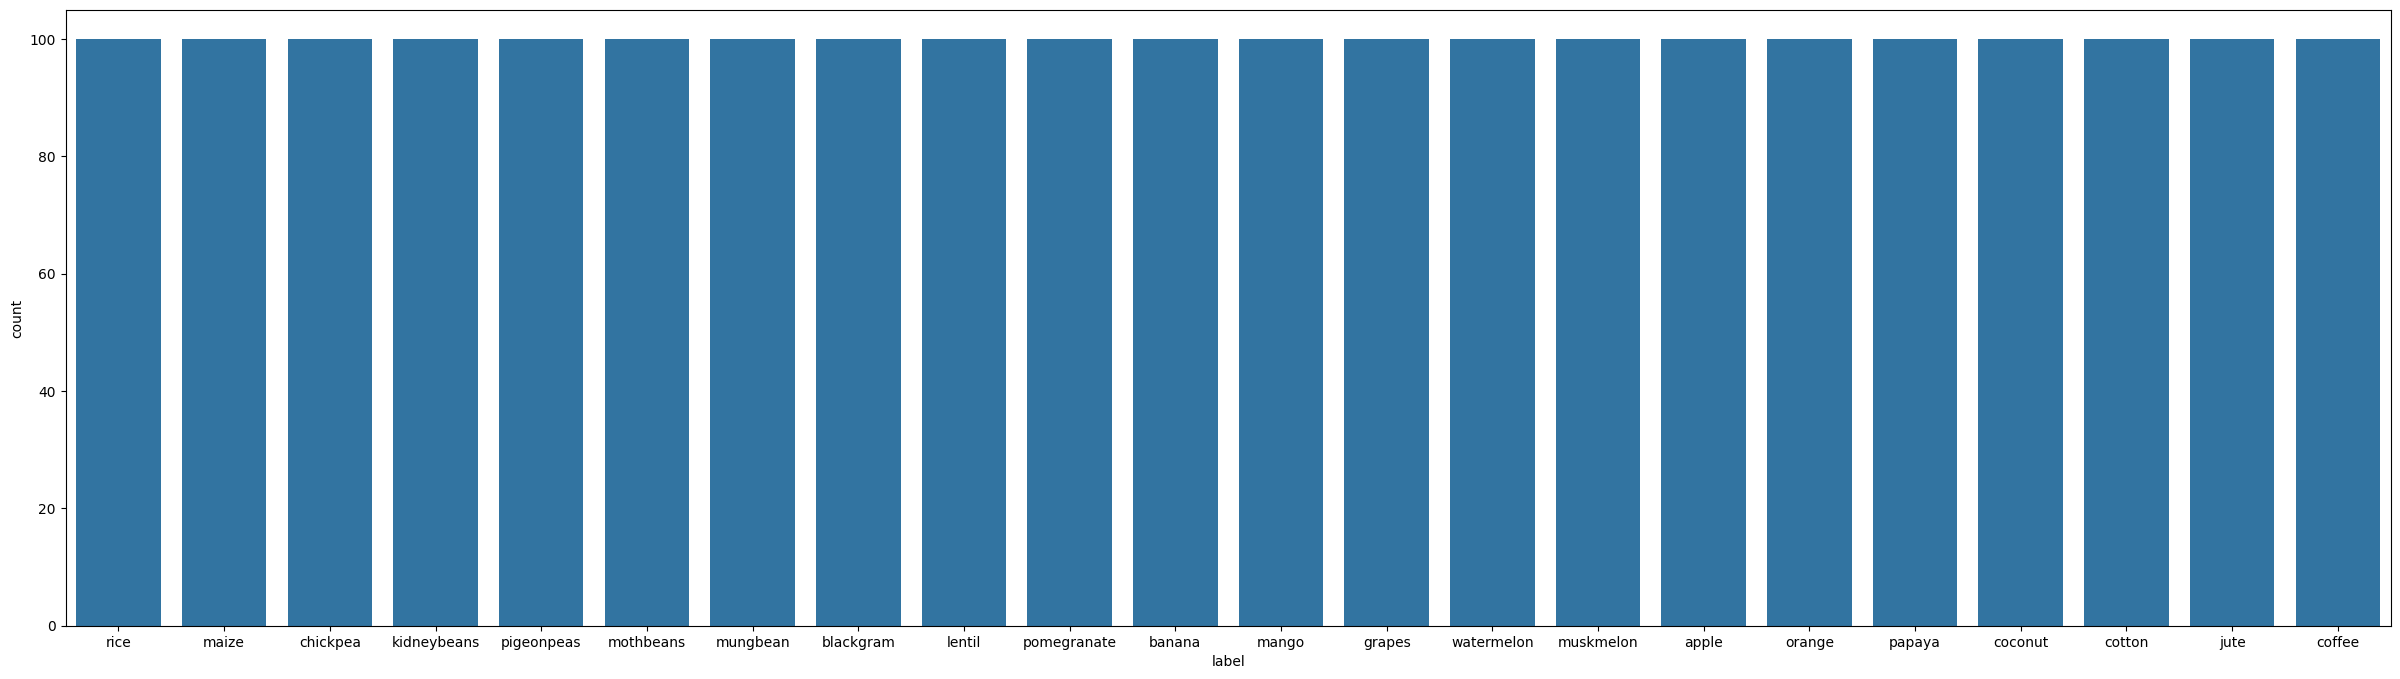

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
sns.countplot(x='label', data = df)

In [45]:
x = df.drop(columns=['label'])
y = df['label']

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=df['label'],shuffle=True)

In [47]:
X_train.shape

(1760, 7)

In [48]:
X_train.describe

<bound method NDFrame.describe of         N   P   K  temperature   humidity        ph    rainfall
851     6  64  23    23.335652  67.404607  7.065264   36.186787
122    74  56  22    18.283622  66.659528  6.829199   80.975733
1131   33  29  34    31.409488  49.217291  6.832980   92.997394
221    25  68  77    20.093406  15.112796  7.701446   85.749049
2066   77  48  36    25.867050  84.099853  7.360085  154.839085
...   ...  ..  ..          ...        ...       ...         ...
1642   24  27   9    18.868832  93.246881  6.157135  119.393698
683    24  44  17    29.859691  80.034996  6.666381   50.664875
1094   85  89  51    29.211449  84.701899  6.158164  108.550144
1919  117  56  15    25.992374  77.054355  7.368258   89.118821
1464  111   5  47    28.033065  91.473558  6.274453   21.179248

[1760 rows x 7 columns]>

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
from sklearn.ensemble import RandomForestClassifier
cs = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=50)
cs.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=50)

In [51]:
y_pred = cs.predict(X_test)
X_train.shape,y_train.shape,X_test.shape,y_pred.shape,len(df['label'].unique())

((1760, 7), (1760,), (440, 7), (440,), 22)

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 19  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

0.9863636363636363

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.90      0.95      0.93        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.95      0.97        20
       maize       0.95      0.95      0.95        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

In [61]:
df.__rand__

<bound method OpsMixin.__rand__ of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [66]:
N = int(input("Nitrogen: "))
P = int(input("Phosphorous: "))
K = int(input("Potassium: "))
temperature = float(input("Temperature: "))
humidity = float(input("Humidity: "))
ph = float(input("ph: "))
rainfall = float(input("Rainfall: "))
arr = [[N,P,K,temperature,humidity,ph,rainfall]]
# arr = [[99,15,27,27.417112,56.636362,6.086922,127.924610]]
arr = sc.transform(arr)
arr_y = cs.predict(arr)

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [64]:
print(arr_y)

['coffee']
